In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# dataset
index       = pd.Series(['A','B','C','D','E','F','G'])
horse_power = pd.Series([130, 250, 190, 300, 210, 220, 170])
weight      = pd.Series([1900, 2600, 2200, 2900, 2400, 2300, 2100])
fuel        = pd.Series([16.3, 10.2, 11.1, 7.1, 12.1, 13.2, 14.2])

# dataframe 도출
Fuel_Efficiency = pd.DataFrame({'index': index, '마력' : horse_power, '총중량' : weight, '연비' : fuel})
print(Fuel_Efficiency)

  index   마력   총중량    연비
0     A  130  1900  16.3
1     B  250  2600  10.2
2     C  190  2200  11.1
3     D  300  2900   7.1
4     E  210  2400  12.1
5     F  220  2300  13.2
6     G  170  2100  14.2


In [6]:
# 각 열에 해당하는 데이터 추출

x1  = Fuel_Efficiency['마력'].to_numpy()
x2  = Fuel_Efficiency['총중량'].to_numpy()
y   = Fuel_Efficiency['연비'].to_numpy()

print(x1)
print(x2)
print(y)

[130 250 190 300 210 220 170]
[1900 2600 2200 2900 2400 2300 2100]
[16.3 10.2 11.1  7.1 12.1 13.2 14.2]


In [7]:
# 선형회귀모델의 입력형식에 맞게 각 벡터의 차원의 확장
x1  = x1[:, np.newaxis]
x2  = x2[:, np.newaxis]
X   = np.c_[np.ones((x1.size, 1)), x1, x2] # 벡터를 열로 만들어 붙이는 연산

In [8]:
# 위 연산을 통해 각 차원의 벡터가 3열로 연도
X

array([[1.0e+00, 1.3e+02, 1.9e+03],
       [1.0e+00, 2.5e+02, 2.6e+03],
       [1.0e+00, 1.9e+02, 2.2e+03],
       [1.0e+00, 3.0e+02, 2.9e+03],
       [1.0e+00, 2.1e+02, 2.4e+03],
       [1.0e+00, 2.2e+02, 2.3e+03],
       [1.0e+00, 1.7e+02, 2.1e+03]])

In [11]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta

array([ 3.06040541e+01, -6.89189189e-03, -7.31081081e-03])

In [12]:
y_hat = theta[1] * x1 + theta[2] * x2 + theta[0]
y_hat = np.concatenate(y_hat).tolist()
y_hat = np.array(y_hat)
y_hat

array([15.81756757,  9.87297297, 13.21081081,  7.33513514, 11.61081081,
       12.27297297, 14.07972973])

In [13]:
diff_square = (y_hat - y)**2 # 오차(에러의 제곱) 도출
print(diff_square)
e_mse = diff_square.sum() / len(y) # '원소 전체 합 / 벡터의 길이'
print(e_mse)

[0.23274105 0.10694668 4.45552228 0.05528853 0.23930606 0.85937911
 0.01446494]
0.851949806949806


In [14]:
print("계수 : [", theta[1],theta[2],"]")
print("절편 : ",theta[0])
print("예측 점수 : ", e_mse)

계수 : [ -0.0068918918918915995 -0.007310810810811627 ]
절편 :  30.604054054052725
예측 점수 :  0.851949806949806


In [15]:
print("270 마력 2500kg 자동차의 예상 연비 : ", 270 * theta[1] + 2500 * theta[2] + theta[0])

270 마력 2500kg 자동차의 예상 연비 :  10.466216216212924


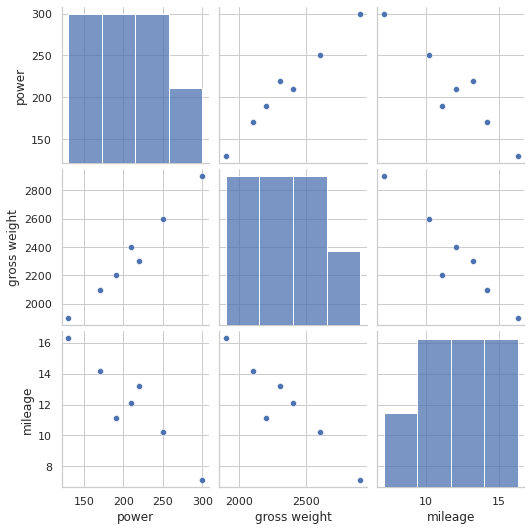

In [16]:
regr = linear_model.LinearRegression()

data = pd.DataFrame(
    {"power": [130, 250, 190, 300, 210, 220, 170],
     "gross weight": [1900, 2600, 2200, 2900, 2400, 2300, 2100],
     "mileage": [16.3, 10.2, 11.1, 7.1, 12.1, 13.2, 14.2]})

sns.set(style='whitegrid')
sns.pairplot(data)
plt.show()

In [17]:
resultset = pd.DataFrame(data={ 'index': index, 'horse power' : horse_power, 'weight' : weight, 'fuel' : fuel, 'estimate': y_hat,
                        'error': diff_square })
resultset.head()

,index,horse power,weight,fuel,estimate,error
0,A,130,1900,16.3,15.817568,0.232741
1,B,250,2600,10.2,9.872973,0.106947
2,C,190,2200,11.1,13.210811,4.455522
3,D,300,2900,7.1,7.335135,0.055289
4,E,210,2400,12.1,11.610811,0.239306


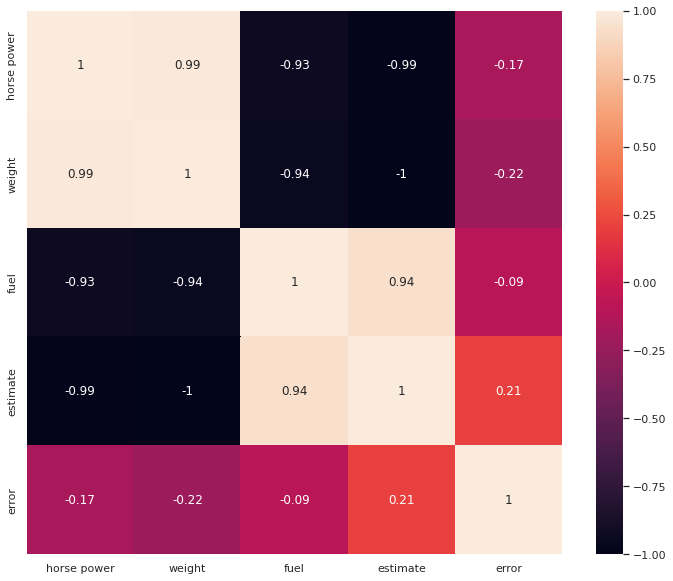

In [18]:
sns.set(rc={'figure.figsize':(12,10)})
correlation_matrix = resultset.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)